In [46]:
#reference :  http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
#importing required packages
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, AffinityPropagation, KMeans
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
import geocoder

In [2]:
#reading data from csv
crime_raw_data = pd.read_csv('data/rpd_crime_2011_to_present.csv')
crime_raw_data.shape

(76228, 40)

In [3]:
#converting city names to upper
crime_raw_data.loc[:,['Address_City']] = crime_raw_data.Address_City.apply(str.upper)

In [4]:
#only getting rochester data
roc_crime_data = crime_raw_data.loc[crime_raw_data.Address_City=='ROCHESTER',:]
#roc_crime_data = crime_raw_data.loc[crime_raw_data.Statute_Text!='Larceny',:]
roc_crime_data.shape

(75468, 40)

In [5]:
roc_crime_data = roc_crime_data.dropna()

In [6]:
roc_crime_data_features = roc_crime_data.loc[:,['X','Y','OccurredFrom_Date_Month','OccurredFrom_Time','Statute_Text']]


In [7]:
X_features = roc_crime_data.loc[:,['X','Y','OccurredFrom_Date_Month','OccurredFrom_Time']]

In [8]:
X_features['X_rad'] = X_features.X.apply(np.radians)
X_features['Y_rad'] = X_features.Y.apply(np.radians)

In [9]:
roc_crime_data_features = X_features.loc[:,['X_rad','Y_rad','OccurredFrom_Date_Month','OccurredFrom_Time']]
roc_crime_data_features.shape

(75107, 4)

In [10]:
roc_crime_data_features = roc_crime_data_features.dropna()
roc_crime_data_features.shape

(75107, 4)

In [11]:
#normalizing data
#X_features = StandardScaler().fit_transform(X_features)

In [10]:
#DBSCAN?

In [12]:
# Compute DBSCAN
#db = DBSCAN(eps=0.5, min_samples=10).fit(X_features)
#db = DBSCAN(eps=1/6371., min_samples=10, metric='haversine').fit(roc_crime_data_features)
#db = AffinityPropagation(preference=-50).fit(roc_crime_data_features)
db = KMeans(n_clusters=10).fit(roc_crime_data_features)
db

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
np.unique(db.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [14]:
clustered_data = X_features.copy()
clustered_data['cluster'] = db.labels_
clustered_data.head()

,X,Y,OccurredFrom_Date_Month,OccurredFrom_Time,X_rad,Y_rad,cluster
0,-77.643682,43.154498,2,1200,-1.355138,0.753188,7
1,-77.643582,43.177149,3,2130,-1.355136,0.753583,8
2,-77.643582,43.177149,4,1626,-1.355136,0.753583,6
3,-77.643582,43.177149,3,1200,-1.355136,0.753583,7
4,-77.604524,43.177964,11,900,-1.354454,0.753598,4


In [15]:
plot_data = clustered_data.loc[clustered_data.cluster != -1,:]
plot_data.shape

(75107, 7)

In [16]:
plot_data.head()

,X,Y,OccurredFrom_Date_Month,OccurredFrom_Time,X_rad,Y_rad,cluster
0,-77.643682,43.154498,2,1200,-1.355138,0.753188,7
1,-77.643582,43.177149,3,2130,-1.355136,0.753583,8
2,-77.643582,43.177149,4,1626,-1.355136,0.753583,6
3,-77.643582,43.177149,3,1200,-1.355136,0.753583,7
4,-77.604524,43.177964,11,900,-1.354454,0.753598,4


In [17]:
%matplotlib inline

In [25]:
roc_crime_list = list(roc_crime_data.Statute_Text.unique())
print(roc_crime_list)

['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [58]:
def get_data():
    input_add = input("Enter address, comma separated")
    lat_long = geocoder.google(input_add).latlng
    print(lat_long)
    X = float(lat_long[1])
    Y = float(lat_long[0])
    add_df = pd.DataFrame([{'X' : X, 'Y' : Y}])
    return (input_add, X,Y)

In [63]:
input_add,adX,adY = get_data()
print(input_add,adX,adY,sep='\n')

Enter address, comma separated100,clinton ave s, rochester , 14604
[43.1545777, -77.6046532]
100,clinton ave s, rochester , 14604
-77.6046532
43.1545777


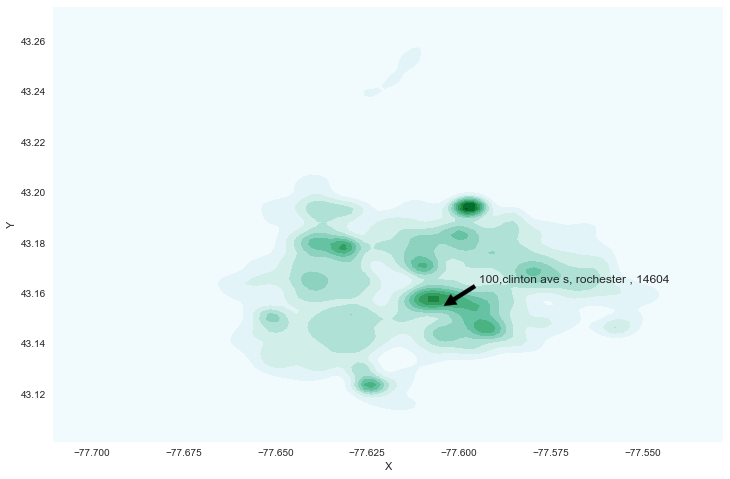

In [68]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 8)
sns.kdeplot(plot_data.X,plot_data.Y,shade=True,ax=ax)
ax.annotate(input_add, xy=(adX, adY), xytext=(adX + 0.01, adY+0.01),arrowprops=dict(facecolor='black', shrink=0.05))


Burglary 14827
Larceny 44441
Aggravated Assault 6350
Motor Vehicle Theft 4149
Robbery 5106
Murder 222
Non-Negligent Manslaughter 12


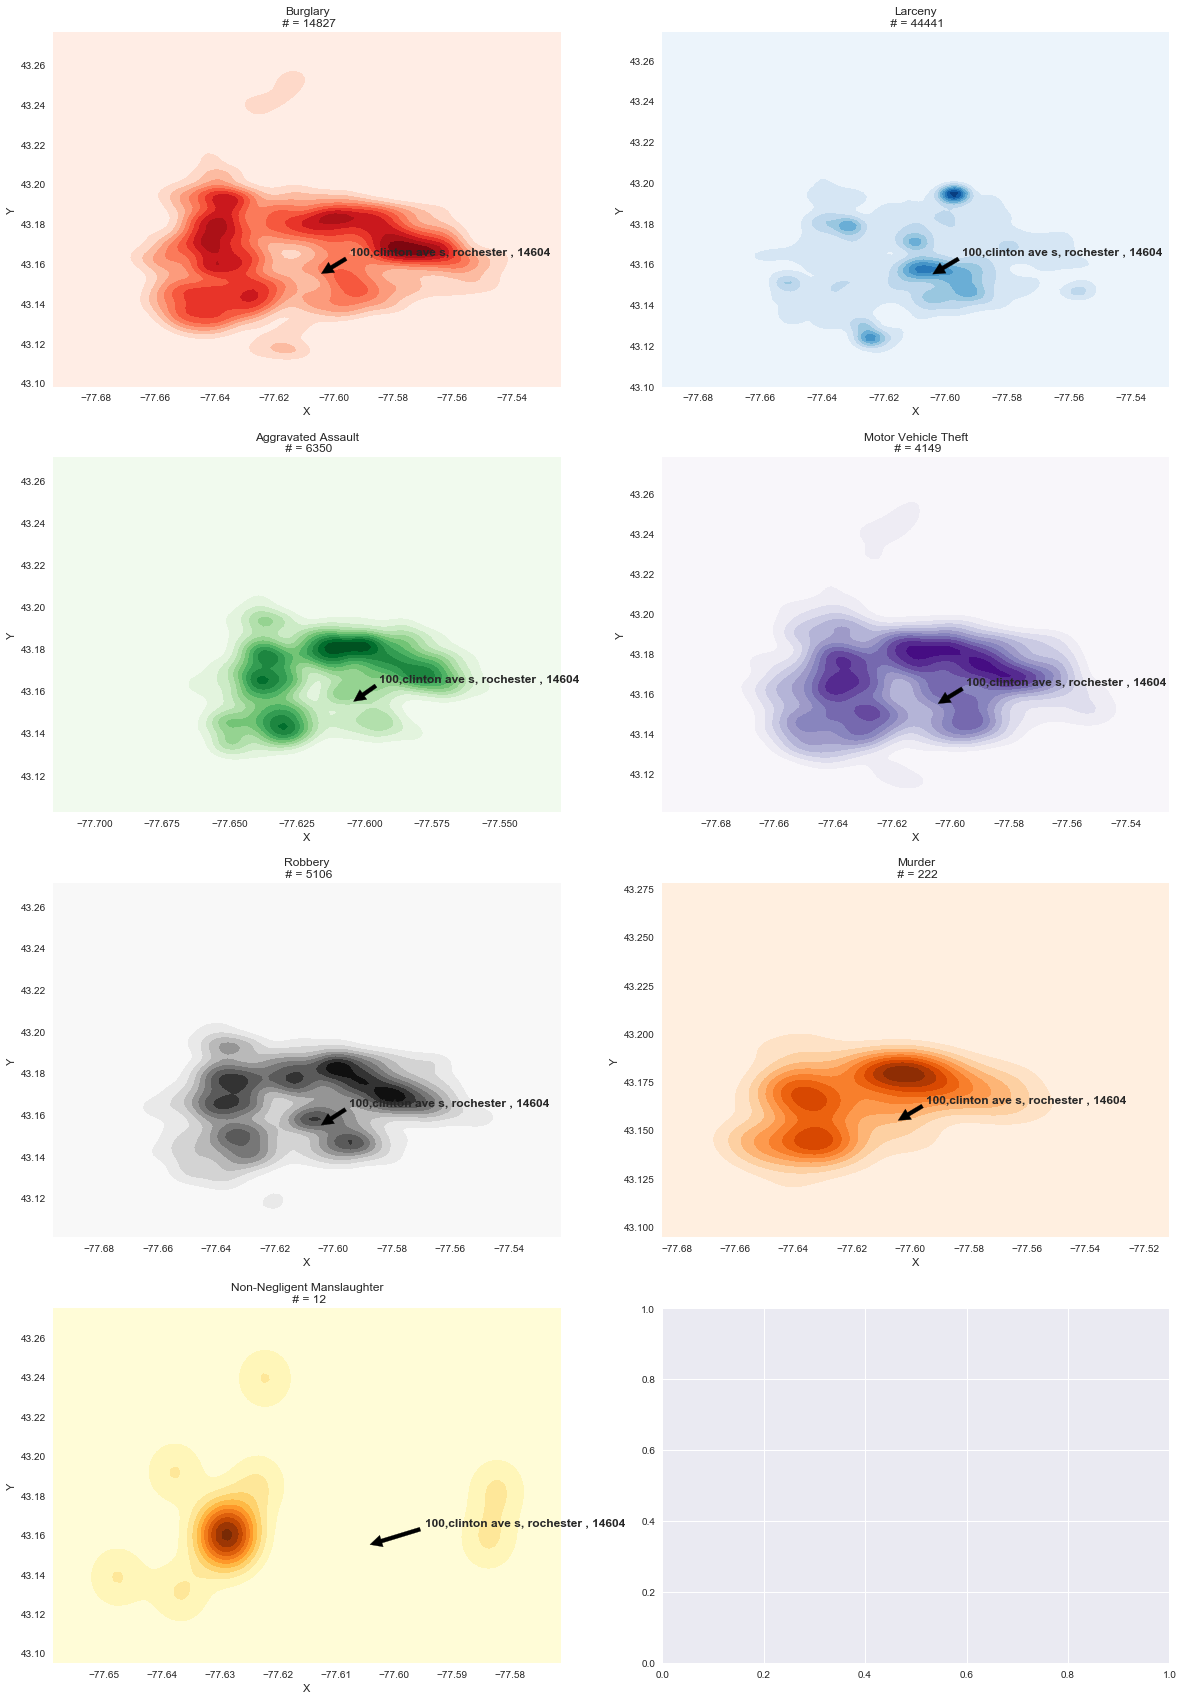

In [70]:
#burglary
colmaps = ['Reds','Blues','Greens','Purples','Greys','Oranges','YlOrBr']
fig, ax = plt.subplots(4,2)
# the size of A4 paper
fig.set_size_inches(20, 30)

ctr = 0
for i in range(4):
    for j in range(2):
        if(ctr>6):
            break
        else:
            crime = roc_crime_list[ctr]
            temp_crime_data = roc_crime_data.loc[roc_crime_data.Statute_Text==crime,:]
            print(crime, temp_crime_data.shape[0])
            sns.kdeplot(temp_crime_data.X,temp_crime_data.Y,shade=True,cmap=colmaps[ctr], ax=ax[i][j])
            #ax[i][j] = sns.pointplot(x='X',y='Y',data=add_df)
            ax[i][j].annotate(input_add, xy=(adX, adY), xytext=(adX + 0.01, adY+0.01),weight="bold", arrowprops=dict(facecolor='black', shrink=0.05))
            ax[i][j].set_title(crime + '\n # = ' + str(temp_crime_data.shape[0]))
            ctr+=1

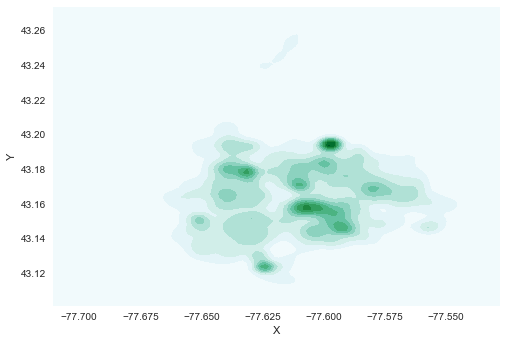

In [37]:
sns.kdeplot(roc_crime_data.X,roc_crime_data.Y,shade=True,col='Statute_Text',col_wrap=2)

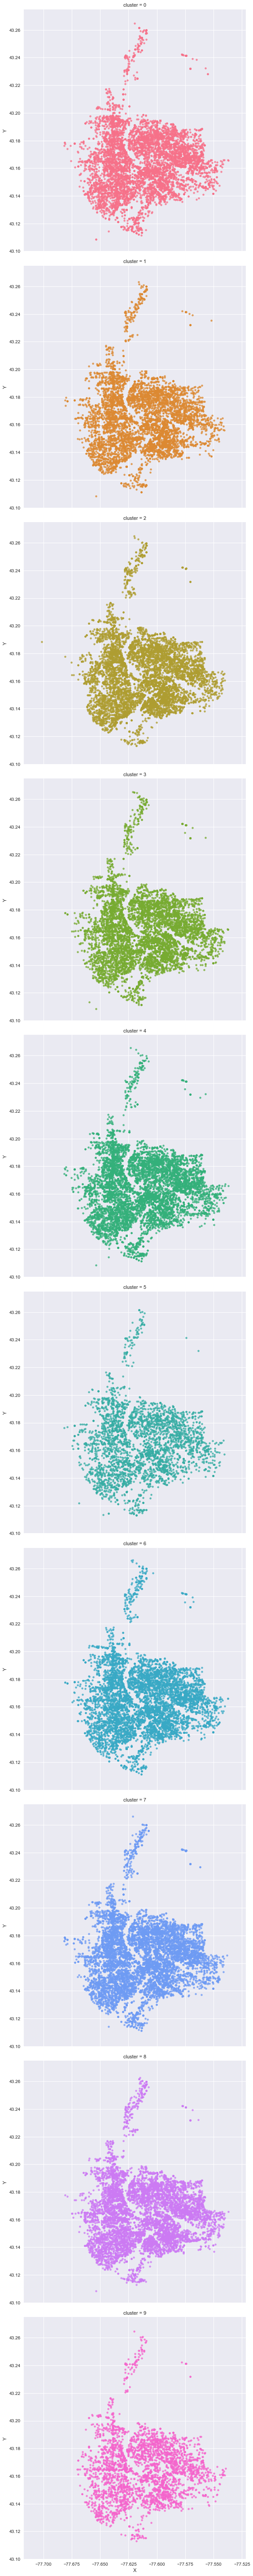

In [21]:
#scatter plot for each type of crime
import seaborn as sns
sns.lmplot(x="X", y="Y", data=plot_data, hue='cluster',size=8,fit_reg=False,legend=False,row='cluster',
          scatter_kws={"s": 20})

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [17]:
np.unique(db.labels_)

array([-1,  0,  1,  2])